## Import Dependencies for Cleaning Data & Building Charts

In [1]:
#Import dependencies 
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

## Adding in the Data

In [2]:
#Read in data files
filepath = os.path.join('resources', 'WDIData.csv')
wdi_data_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources', 'indicator_df.csv')
indicator_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources','HDI_df.csv')
hdi_df = pd.read_csv(filepath)

filepath = filepath = os.path.join('resources','undp_hdr_education-index.csv')
edu_index_df = pd.read_csv(filepath)

filepath = filepath = os.path.join('resources','undp_hdr_gender-inequality-index.csv')
gii_df = pd.read_csv(filepath)

filepath= os.path.join('resources', 'WDISeries.csv')
series_df = pd.read_csv(filepath, header=0)

## Cleaning the Data
### Datasets included:
 - The World Bank's World Development Indicators Data
 - United Nations Development Program Human Development Reports
   - Human Development Index
   - Education Index
   - Gender

In [3]:
#Pull all in all indicicators from 1990-2019
full_ind_1990_2019 = wdi_data_df[["Country Name","Country Code","Indicator Name","Indicator Code",
                                  "1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                  "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                  "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]]

In [4]:
#Reformat years from columns to rows
full_ind_reformatted = pd.melt(full_ind_1990_2019, id_vars =["Country Name","Country Code","Indicator Name","Indicator Code"], 
                               value_vars=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                           "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                           "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]) 

In [5]:
#Drop all NaN from full 1990-2019 dataset 
ind_nan_dropped = full_ind_reformatted.dropna()
ind_nan_dropped_renamed = ind_nan_dropped.rename(columns={"Country Name":"country_name","Country Code":"country_code","Indicator Name":"indicator_name","Indicator Code":"indicator_code","variable":"year"})

In [6]:
#Read in indicator topic data
code_topics_df = series_df[["Series Code","Topic"]]
code_topics_renamed = code_topics_df.rename(columns={"Series Code":"series_code","Topic":"topic"})

In [7]:
#Merge indicators and topics
indicators_and_topics = pd.merge(ind_nan_dropped_renamed, code_topics_renamed, left_on = ["indicator_code"], right_on=["series_code"])
indicators_and_topics.head()

,country_name,country_code,indicator_name,indicator_code,year,value,series_code,topic
0,Arab World,ARB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,1642.330558,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
1,Caribbean small states,CSS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,2346.020996,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
2,Early-demographic dividend,EAR,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,733.593753,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
3,East Asia & Pacific,EAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,2112.948079,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...
4,East Asia & Pacific (excluding high income),EAP,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,347.860363,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...


In [8]:
#Reformat the HDI dataframe
hdi_reformatted = pd.melt(hdi_df, id_vars =["Country"], 
                               value_vars=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
                                           "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                                           "2010","2011","2012","2013","2014","2015","2016","2017","2018"]) 
hdi_reformatted.head()

,Country,variable,value
0,Afghanistan,1990,0.298
1,Albania,1990,0.644
2,Algeria,1990,0.578
3,Andorra,1990,..
4,Angola,1990,..


In [9]:
#Merge primary indicators and HDI
indicators_hdi = pd.merge(indicators_and_topics, hdi_reformatted, left_on = ["country_name", "year"], right_on=["Country", "variable"])
indicators_hdi.head()

,country_name,country_code,indicator_name,indicator_code,year,value_x,series_code,topic,Country,variable,value_y
0,South Asia,SAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,319.819260,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...,South Asia,1990,0.441
1,South Asia,SAS,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,1990,12.673175,NY.ADJ.NNAT.GN.ZS,Economic Policy & Debt: National accounts: Adj...,South Asia,1990,0.441
2,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,103.355412,SP.ADO.TFRT,Health: Reproductive health,South Asia,1990,0.441
3,South Asia,SAS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1990,74.691545,SP.POP.DPND,Health: Population: Dynamics,South Asia,1990,0.441
4,South Asia,SAS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1990,6.553456,SP.POP.DPND.OL,Health: Population: Dynamics,South Asia,1990,0.441


In [10]:
indicators_hdi_dropped = indicators_hdi.drop(["series_code","Country", "variable"], axis=1)
indicators_hdi_renamed = indicators_hdi_dropped.rename(columns={"value_x":"value","value_y":"hdi"})
indicators_hdi_renamed["category"] = indicators_hdi_renamed["topic"].str.split(':').str[0]
indicators_hdi_renamed["subcategory"] = indicators_hdi_renamed["topic"].str.split(':').str[1]
indicators_hdi_renamed.head()

,country_name,country_code,indicator_name,indicator_code,year,value,topic,hdi,category,subcategory
0,South Asia,SAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,319.819260,Economic Policy & Debt: National accounts: Adj...,0.441,Economic Policy & Debt,National accounts
1,South Asia,SAS,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,1990,12.673175,Economic Policy & Debt: National accounts: Adj...,0.441,Economic Policy & Debt,National accounts
2,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,103.355412,Health: Reproductive health,0.441,Health,Reproductive health
3,South Asia,SAS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1990,74.691545,Health: Population: Dynamics,0.441,Health,Population
4,South Asia,SAS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1990,6.553456,Health: Population: Dynamics,0.441,Health,Population


In [11]:
twb_wdi_indicators_final = indicators_hdi_renamed[["country_name","country_code","indicator_name","indicator_code","topic","category","subcategory","year","value","hdi"]]
twb_wdi_indicators_final.head()

,country_name,country_code,indicator_name,indicator_code,topic,category,subcategory,year,value,hdi
0,South Asia,SAS,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,Economic Policy & Debt: National accounts: Adj...,Economic Policy & Debt,National accounts,1990,319.819260,0.441
1,South Asia,SAS,Adjusted savings: net national savings (% of GNI),NY.ADJ.NNAT.GN.ZS,Economic Policy & Debt: National accounts: Adj...,Economic Policy & Debt,National accounts,1990,12.673175,0.441
2,South Asia,SAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Health: Reproductive health,Health,Reproductive health,1990,103.355412,0.441
3,South Asia,SAS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,Health: Population: Dynamics,Health,Population,1990,74.691545,0.441
4,South Asia,SAS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Health: Population: Dynamics,Health,Population,1990,6.553456,0.441


In [12]:
#Pull out just the WDI values
wdi_values = twb_wdi_indicators_final[["country_name","indicator_name","year","value","hdi"]]
wdi_values.head()

,country_name,indicator_name,year,value,hdi
0,South Asia,Adjusted net national income per capita (curre...,1990,319.819260,0.441
1,South Asia,Adjusted savings: net national savings (% of GNI),1990,12.673175,0.441
2,South Asia,"Adolescent fertility rate (births per 1,000 wo...",1990,103.355412,0.441
3,South Asia,Age dependency ratio (% of working-age populat...,1990,74.691545,0.441
4,South Asia,"Age dependency ratio, old (% of working-age po...",1990,6.553456,0.441


In [13]:
#Select the relevent columns from the Gender Inequality Index dataframe
gii_2014_2018 = gii_df[["Country","2014","2015","2016","2017","2018"]]

#Add column for indicator name
gii_2014_2018["indicator_name"] = "Gender Inequality Index"

#Pull out space from Country column values
gii_2014_2018["country_name"] = gii_2014_2018["Country"].str.split(" ").str[1]

/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Pivot years
gii_2014_2018_pivot = pd.melt(gii_2014_2018, id_vars =["country_name","indicator_name"], 
                               value_vars=["2014","2015","2016","2017","2018"])

In [15]:
#Add in HDI
gii_hdi_combined = pd.merge(gii_2014_2018_pivot, hdi_reformatted, how="left",
                            left_on=["country_name", "variable"], 
                            right_on=["Country", "variable"])

In [16]:
#Rename columns
gii_hdi_renamed = gii_hdi_combined.rename(columns={"variable":"year", "value_x":"value","value_y":"hdi"})

#Select final dataframe columns
gii_hdi = gii_hdi_renamed[["country_name","indicator_name","year","value","hdi"]]

#Preview GII dataframe
gii_hdi.head()

,country_name,indicator_name,year,value,hdi
0,Afghanistan,Gender Inequality Index,2014,0.623,0.488
1,Albania,Gender Inequality Index,2014,0.261,0.787
2,Algeria,Gender Inequality Index,2014,0.439,0.749
3,Angola,Gender Inequality Index,2014,0.577,0.557
4,Argentina,Gender Inequality Index,2014,0.365,0.825


In [17]:
#Select the relevent columns from the Gender Inequality Index dataframe
ei_2014_2018 = edu_index_df[["Country","2014","2015","2016","2017","2018"]]

#Add column for indicator name
ei_2014_2018["indicator_name"] = "Education Index"

#Pull out space from Country column values
ei_2014_2018["country_name"] = ei_2014_2018["Country"].str.split(" ").str[1]

/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindseymckenna/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#Pivot years
ei_2014_2018_pivot = pd.melt(ei_2014_2018, id_vars =["country_name","indicator_name"], 
                               value_vars=["2014","2015","2016","2017","2018"])

In [19]:
#Add in HDI
ei_hdi_combined = pd.merge(ei_2014_2018_pivot, hdi_reformatted, how="left",
                            left_on=["country_name", "variable"], 
                            right_on=["Country", "variable"])

In [20]:
#Rename columns
ei_hdi_renamed = ei_hdi_combined.rename(columns={"variable":"year", "value_x":"value","value_y":"hdi"})

#Select final dataframe columns
ei_hdi = ei_hdi_renamed[["country_name","indicator_name","year","value","hdi"]]

#Preview GII dataframe
ei_hdi.head()

,country_name,indicator_name,year,value,hdi
0,Afghanistan,Education Index,2014,0.403,0.488
1,Albania,Education Index,2014,0.774,0.787
2,Algeria,Education Index,2014,0.662,0.749
3,Andorra,Education Index,2014,0.715,0.853
4,Angola,Education Index,2014,0.46,0.557


In [21]:
#Create combined indicators dataframe from both WDI and UNDP datasets
all_indicators = [wdi_values, gii_hdi, ei_hdi]
combined_indicators = pd.concat(all_indicators)

#Drop ".." rows
dropped_non_float = combined_indicators[combined_indicators.value != ".."]
dropped_non_float = dropped_non_float[dropped_non_float.hdi != ".."]

#Asign value and hdi columns as floats
dropped_non_float["value"] = dropped_non_float["value"].astype(float)
dropped_non_float["hdi"] = dropped_non_float["hdi"].astype(float)
dropped_non_float.head()

,country_name,indicator_name,year,value,hdi
0,South Asia,Adjusted net national income per capita (curre...,1990,319.819260,0.441
1,South Asia,Adjusted savings: net national savings (% of GNI),1990,12.673175,0.441
2,South Asia,"Adolescent fertility rate (births per 1,000 wo...",1990,103.355412,0.441
3,South Asia,Age dependency ratio (% of working-age populat...,1990,74.691545,0.441
4,South Asia,"Age dependency ratio, old (% of working-age po...",1990,6.553456,0.441


In [22]:
combined_indicators_final = dropped_non_float
combined_indicators_final.dtypes

country_name       object
indicator_name     object
year               object
value             float64
hdi               float64
dtype: object

## Working with Primary Indicators 
Indicators tracked by the most countries over the most years

In [82]:
#Set chart style for all included charts in notebook
plt.style.use('seaborn-darkgrid')

In [56]:
#Pull out primary indicators (most commonly tracked by countries over the years)
common_indicators = [
    "Population, total",
    "Agriculture, forestry, and fishing, value added (% of GDP)",
    "Life expectancy at birth, total (years)",
    "GDP (current US$)",
    "GNI per capita, Atlas method (current US$)",
    "Employers, total (% of total employment) (modeled ILO estimate)"]

primary_indicators = combined_indicators_final[combined_indicators_final['indicator_name'].isin(common_indicators) ]

filepath = os.path.join('resources','primary_indicators.csv')
primary_indicators.to_csv(filepath)

primary_indicators.head()

,country_name,indicator_name,year,value,hdi
14,South Asia,"Agriculture, forestry, and fishing, value adde...",1990,2.691710e+01,0.441
100,South Asia,GDP (current US$),1990,4.072274e+11,0.441
159,South Asia,"Life expectancy at birth, total (years)",1990,5.814480e+01,0.441
333,South Asia,"Population, total",1990,1.133495e+09,0.441
428,South Asia,"GNI per capita, Atlas method (current US$)",1990,3.780468e+02,0.441


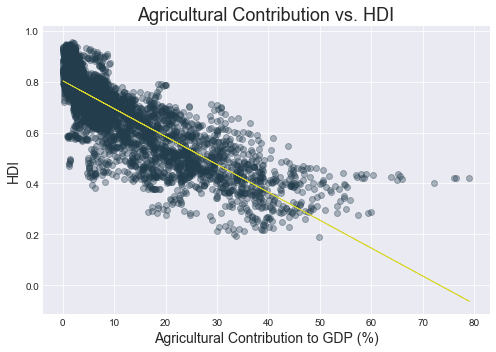

0.6693471279084982


In [218]:
#Create Agricultural v. HDI chart
agri_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Agriculture, forestry, and fishing, value added (% of GDP)')]

# defining variables
x = agri_values['value']
y = agri_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Agricultural Contribution to GDP (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Agricultural Contribution vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Agriculture_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)


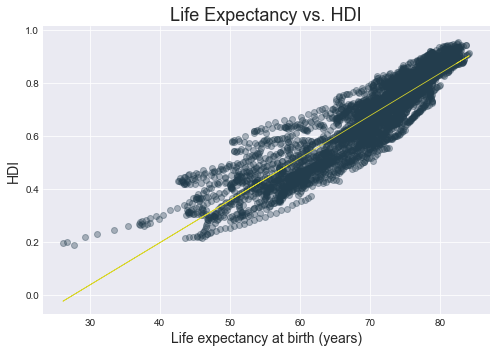

0.8358149986317633


In [219]:
#Create Life Expectancy v. HDI chart
life_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Life expectancy at birth, total (years)')]

# defining variables
x = life_values['value']
y = life_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Life expectancy at birth (years)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Life Expectancy vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Life-expectancy_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

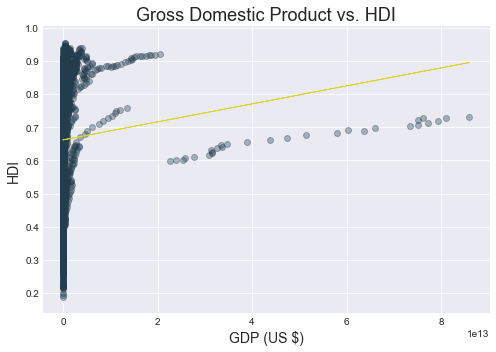

0.0056415910282771485


In [216]:
#Create GDP v. HDI chart
gdp_values = primary_indicators.loc[(primary_indicators['indicator_name']=='GDP (current US$)')]

# defining variables
x = gdp_values['value']
y = gdp_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('GDP (US $)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Gross Domestic Product vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'GDP_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

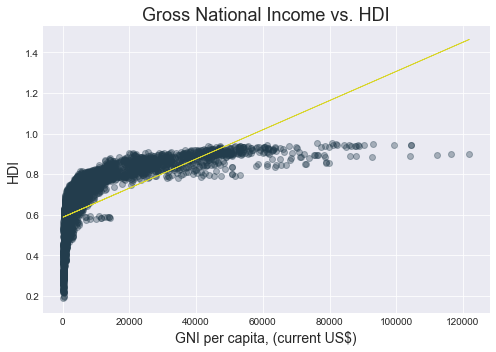

0.4730176801242705


In [215]:
#Create Employment v. HDI chart

GNI_values = primary_indicators.loc[(primary_indicators['indicator_name']=='GNI per capita, Atlas method (current US$)')]

# defining variables
x = GNI_values['value']
y = GNI_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('GNI per capita, (current US$)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Gross National Income vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'GNI_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

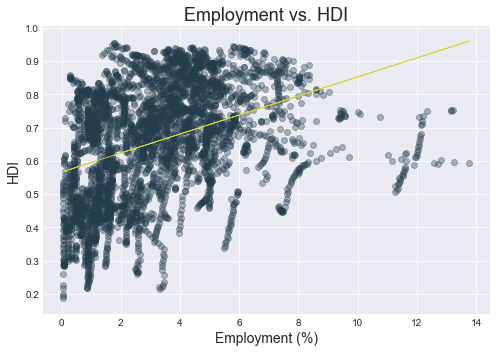

0.1437001490543193


In [212]:
#Create Employment v. HDI chart
employment_values = primary_indicators.loc[(primary_indicators['indicator_name']=='Employers, total (% of total employment) (modeled ILO estimate)')]

# defining variables
x = employment_values['value']
y = employment_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Employment (%)',fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Employment vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Employment_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

## Working with Secondary Indicators

In [34]:
#Pull out selected education indicators for a deeper look into how education impacts HDI
education_indicators = ["Education Index",
                        "Labor force with basic education (% of total working-age population with basic education)",
                        "Labor force with intermediate education (% of total working-age population with intermediate education)",
                        "Labor force with advanced education (% of total working-age population with advanced education)",
                        "Government expenditure on education, total (% of GDP)",
                        "Literacy rate, adult total (% of people ages 15 and above)"]

secondary_indicators_education = combined_indicators_final[combined_indicators_final['indicator_name'].isin(education_indicators) ]

#Save to CSV
filepath = os.path.join('resources','education_df.csv')
secondary_indicators_education.to_csv(filepath)

#Preview data frame
secondary_indicators_education.head()

,country_name,indicator_name,year,value,hdi
162,South Asia,"Literacy rate, adult total (% of people ages 1...",1990,45.473709,0.441
743,Sub-Saharan Africa,"Literacy rate, adult total (% of people ages 1...",1990,52.526730,0.402
1267,World,"Literacy rate, adult total (% of people ages 1...",1990,74.370369,0.598
3964,Argentina,"Government expenditure on education, total (% ...",1990,1.067380,0.707
4615,Australia,"Government expenditure on education, total (% ...",1990,4.675560,0.866


In [41]:
#Pull out selected gender indicators for a deeper look into how gender parity impacts HDI
gender_indicators = [
    "Gender Inequality Index",
    "Labor force, female (% of total labor force)",
    "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "School enrollment, primary (gross), gender parity index (GPI)",
    "School enrollment, secondary (gross), gender parity index (GPI)",
    "School enrollment, tertiary (gross), gender parity index (GPI)",
    "Proportion of seats held by women in national parliaments (%)"]

secondary_indicators_gender = combined_indicators_final[combined_indicators_final['indicator_name'].isin(gender_indicators) ]

#Save to CSV
filepath = os.path.join('resources','gender_df.csv')
secondary_indicators_gender.to_csv(filepath)

#Preview data frame
secondary_indicators_gender.head()

,country_name,indicator_name,year,value,hdi
152,South Asia,"Labor force, female (% of total labor force)",1990,24.515539,0.441
349,South Asia,Proportion of seats held by women in national ...,1990,6.336537,0.441
373,South Asia,"School enrollment, primary (gross), gender par...",1990,0.736960,0.441
380,South Asia,"School enrollment, secondary (gross), gender p...",1990,0.578020,0.441
384,South Asia,"School enrollment, tertiary (gross), gender pa...",1990,0.479250,0.441


In [40]:
#Pull out selected accessiblity (to basic and technology needs) indicators for a deeper look into how access to these things impacts HDI
access_indicators = [
    "Mobile cellular subscriptions (per 100 people)",
    "Individuals using the Internet (% of population)",
    "People using at least basic drinking water services (% of population)",
    "Access to clean fuels and technologies for cooking (% of population)",
    "Access to electricity (% of population)",
    "People using at least basic sanitation services (% of population)"]

secondary_indicators_access = combined_indicators_final[combined_indicators_final['indicator_name'].isin(access_indicators) ]

#Save to CSV
filepath = os.path.join('resources','access_df.csv')
secondary_indicators_access.to_csv(filepath)

#Preview data frame
secondary_indicators_access.head()

,country_name,indicator_name,year,value,hdi
204,South Asia,Mobile cellular subscriptions (per 100 people),1990,0.000266,0.441
785,Sub-Saharan Africa,Mobile cellular subscriptions (per 100 people),1990,0.001547,0.402
1308,World,Mobile cellular subscriptions (per 100 people),1990,0.210930,0.598
1608,World,Individuals using the Internet (% of population),1990,0.049235,0.598
1805,Albania,Mobile cellular subscriptions (per 100 people),1990,0.000000,0.644


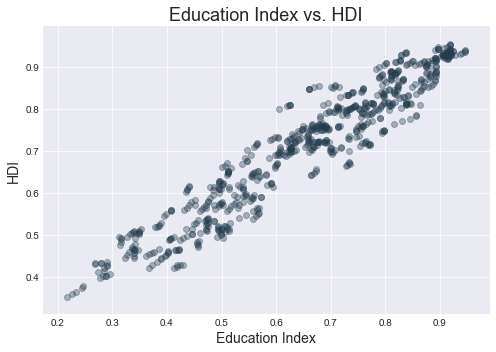

nan


In [192]:
#Create Education Index v. HDI chart
edu_1_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Education Index')]

# defining variables
x = edu_1_values['value']
y = edu_1_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Education Index', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Education Index vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Education_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

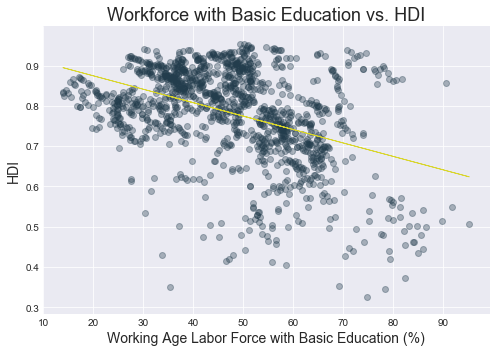

0.17662955254045581


In [193]:
#Create Workforce with Basic Education Index v. HDI chart
edu_2_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Labor force with basic education (% of total working-age population with basic education)')]

# defining variables
x = edu_2_values['value']
y = edu_2_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Working Age Labor Force with Basic Education (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Workforce with Basic Education vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'WorkForceBasicEducation_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

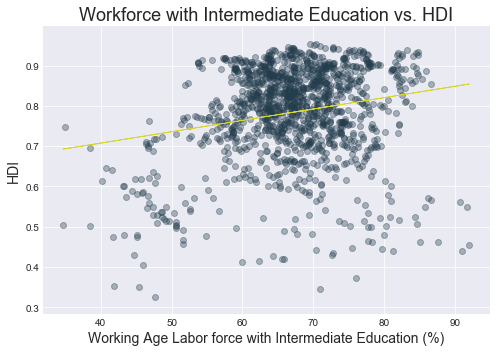

0.04018920790829672


In [194]:
#Create Workforce with Intermediate Education Index v. HDI chart
edu_3_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Labor force with intermediate education (% of total working-age population with intermediate education)')]

# defining variables
x = edu_3_values['value']
y = edu_3_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Working Age Labor force with Intermediate Education (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Workforce with Intermediate Education vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'WorkForceIntermediateEducation_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

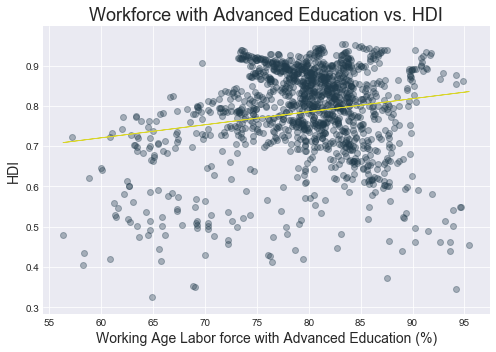

0.03039566300456451


In [195]:
#Create Workforce with Advanced Education Index v. HDI chart
edu_4_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Labor force with advanced education (% of total working-age population with advanced education)')]

# defining variables
x = edu_4_values['value']
y = edu_4_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Working Age Labor force with Advanced Education (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Workforce with Advanced Education vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'WorkForceAdvancedEducation_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

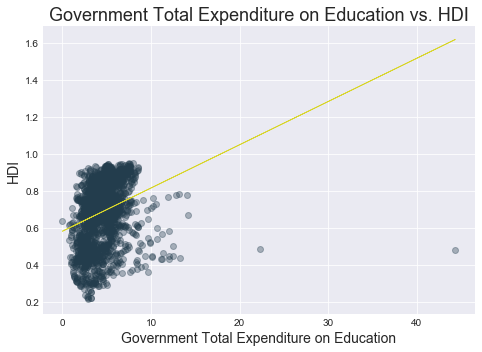

0.07720257184712688


In [196]:
#Create Government Total Expenditure on Education v. HDI chart
edu_5_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Government expenditure on education, total (% of GDP)')]

# defining variables
x = edu_5_values['value']
y = edu_5_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Government Total Expenditure on Education', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Government Total Expenditure on Education vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'ExpenditureEducation_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

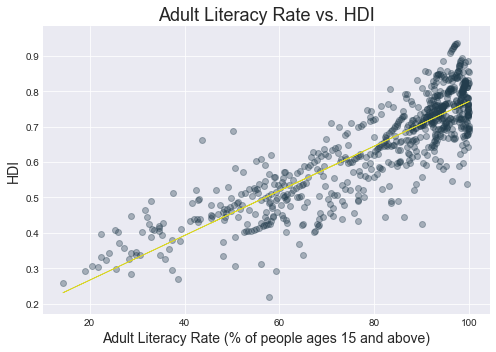

0.7410806009404856


In [197]:
#Create Adult Literacy Rate v. HDI chart
edu_6_values = secondary_indicators_education.loc[(secondary_indicators_education['indicator_name']=='Literacy rate, adult total (% of people ages 15 and above)')]

# defining variables
x = edu_6_values['value']
y = edu_6_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Adult Literacy Rate (% of people ages 15 and above)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Adult Literacy Rate vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Literacy_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

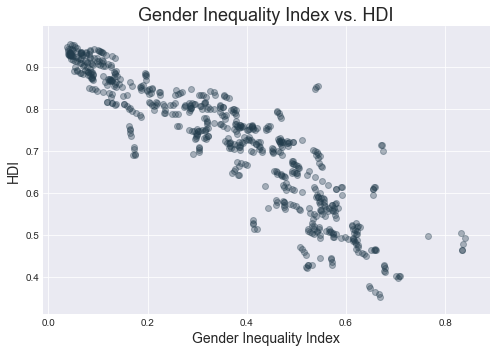

nan


In [198]:
#Create Gender Inequality Index v. HDI chart
gender_1_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='Gender Inequality Index')]

# defining variables
x = gender_1_values['value']
y = gender_1_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Gender Inequality Index', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Gender Inequality Index vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'GII_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

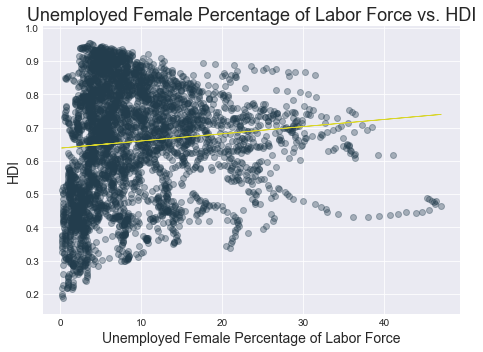

0.008745636519623014


In [199]:
#Create Female Unemployment v. HDI chart
gender_2_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)')]

# defining variables
x = gender_2_values['value']
y = gender_2_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Unemployed Female Percentage of Labor Force', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Unemployed Female Percentage of Labor Force vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Female_Unemployment_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)


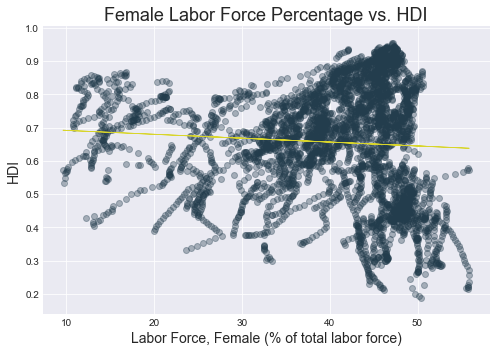

0.00435055569686037


In [200]:
#Create Female Labor Force Percentage v. HDI chart
gender_3_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='Labor force, female (% of total labor force)')]

# defining variables
x = gender_3_values['value']
y = gender_3_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Labor Force, Female (% of total labor force)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Female Labor Force Percentage vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Female_Labor_Force.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

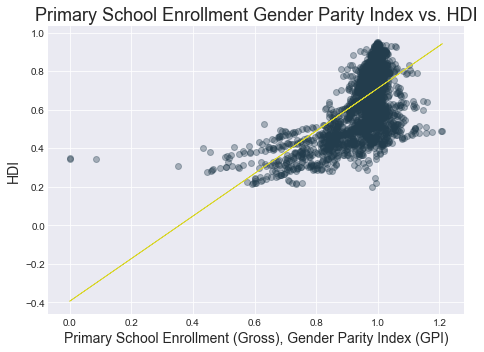

0.3611001662474125


In [201]:
#Create Primary School enrollment Gender parity index (GPI) v. HDI chart
gender_4_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='School enrollment, primary (gross), gender parity index (GPI)')]

# defining variables
x = gender_4_values['value']
y = gender_4_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Primary School Enrollment (Gross), Gender Parity Index (GPI)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Primary School Enrollment Gender Parity Index vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Primary_GPI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

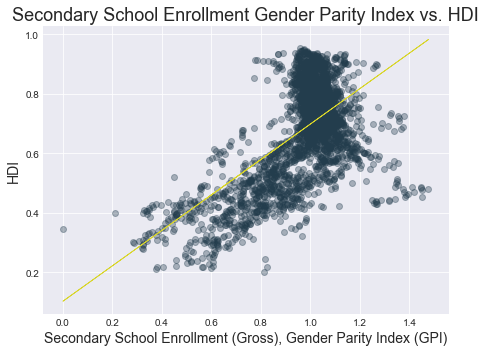

0.35831589123495405


In [202]:
#Create Secondary School enrollment Gender parity index (GPI) v. HDI chart
gender_5_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='School enrollment, secondary (gross), gender parity index (GPI)')]

# defining variables
x = gender_5_values['value']
y = gender_5_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Secondary School Enrollment (Gross), Gender Parity Index (GPI)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Secondary School Enrollment Gender Parity Index vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Secondary_GPI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

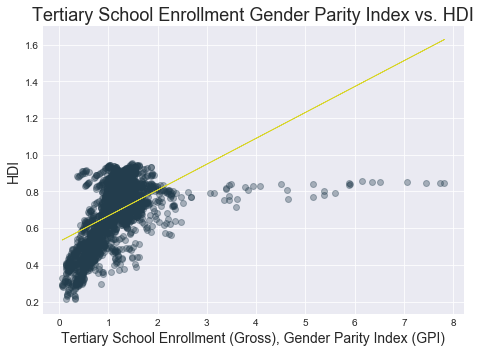

0.2778443908234313


In [203]:
#Create Tertiary School enrollment Gender tertiary index (GPI) v. HDI chart
gender_6_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='School enrollment, tertiary (gross), gender parity index (GPI)')]

# defining variables
x = gender_6_values['value']
y = gender_6_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Tertiary School Enrollment (Gross), Gender Parity Index (GPI)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Tertiary School Enrollment Gender Parity Index vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Tertiary_GPI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

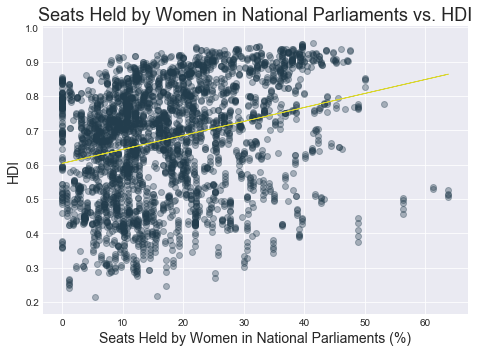

0.07895800895347509


In [204]:
#Create Percentage of Seats Held by Women in National Parliaments v. HDI chart
gender_7_values = secondary_indicators_gender.loc[(secondary_indicators_gender['indicator_name']=='Proportion of seats held by women in national parliaments (%)')]

# defining variables
x = gender_7_values['value']
y = gender_7_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Seats Held by Women in National Parliaments (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Seats Held by Women in National Parliaments vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Women_ParliamentSeats.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

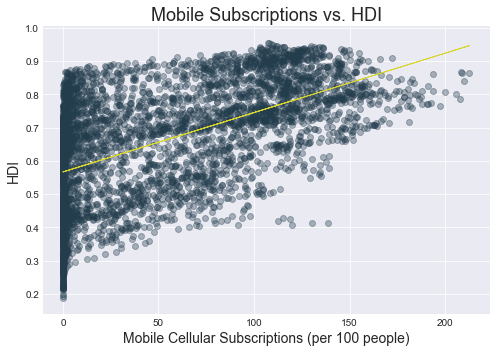

0.30721460371993703


In [205]:
#Create Mobile Subscriptions v. HDI chart
access_1_values = secondary_indicators_access.loc[(secondary_indicators_access['indicator_name']=='Mobile cellular subscriptions (per 100 people)')]

# defining variables
x = access_1_values['value']
y = access_1_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Mobile Cellular Subscriptions (per 100 people)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Mobile Subscriptions vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Mobile_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

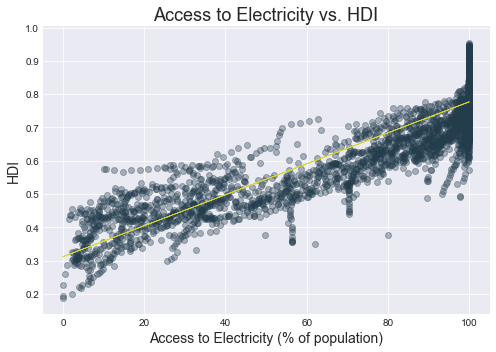

0.7785158770954063


In [206]:
#Create Access to Electricity v. HDI chart
access_2_values = secondary_indicators_access.loc[(secondary_indicators_access['indicator_name']=='Access to electricity (% of population)')]

# defining variables
x = access_2_values['value']
y = access_2_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Access to Electricity (% of population)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Access to Electricity vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Electric_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

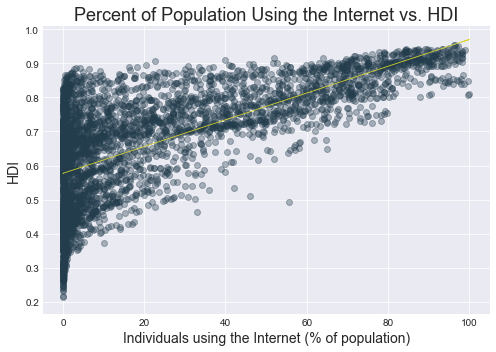

0.46160680267597476


In [207]:
#Create Percent of Population Using the Internet v. HDI chart
access_3_values = secondary_indicators_access.loc[(secondary_indicators_access['indicator_name']=='Individuals using the Internet (% of population)')]

# defining variables
x = access_3_values['value']
y = access_3_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Individuals using the Internet (% of population)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Percent of Population Using the Internet vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Internet_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

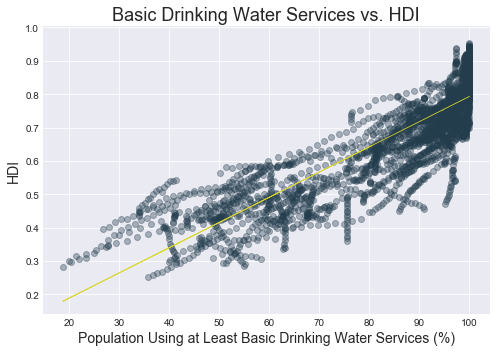

0.7446054600057809


In [208]:
#Create Percent of Population with at least Drinking Water Services v. HDI chart
access_4_values = secondary_indicators_access.loc[(secondary_indicators_access['indicator_name']=='People using at least basic drinking water services (% of population)')]

# defining variables
x = access_4_values['value']
y = access_4_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Population Using at Least Basic Drinking Water Services (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Basic Drinking Water Services vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Water_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

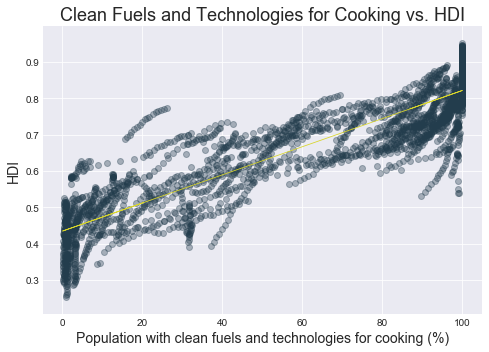

0.8036173325957244


In [209]:
#Create Percent of Population with Clean Fuels and Technologies for Cooking v. HDI chart
access_5_values = secondary_indicators_access.loc[(secondary_indicators_access['indicator_name']=='Access to clean fuels and technologies for cooking (% of population)')]

# defining variables
x = access_5_values['value']
y = access_5_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)
plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Population with clean fuels and technologies for cooking (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Clean Fuels and Technologies for Cooking vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Cooking_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)

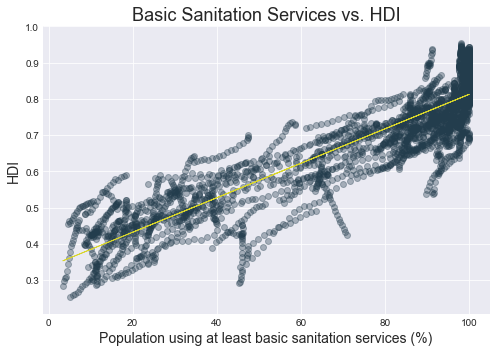

0.8075091430657999


In [211]:
#Create Percent of Population with at least Basic Sanitation Services v. HDI chart
access_6_values = secondary_indicators_access.loc[(secondary_indicators_access['indicator_name']=='People using at least basic sanitation services (% of population)')]

# defining variables
x = access_6_values['value']
y = access_6_values['hdi']

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color="#233D4D", alpha=0.35, zorder=2)

plt.plot(x, fit, color="#D8D52B", label='fitted line', linewidth=0.8)
plt.grid(zorder=0)

plt.xlabel('Population using at least basic sanitation services (%)', fontsize=14)
plt.ylabel('HDI', fontsize=14)
plt.title("Basic Sanitation Services vs. HDI", fontsize=18)

# Show the figure
plt.tight_layout()
img_path = os.path.join('static/images', 'Cooking_HDI.png')
plt.savefig(img_path, transparent=True)
plt.show()

print(r_value**2)